# sentiment_lstm.py
   This program will classify reviews from IMDB based on sentiment, positive or    negative.  We will used the IMDB database that comes with Keras. 
   This data has already preprocessed the reviews.  This preprocessing     replaces the actual words with the encoding.  So the second most    popular word is replaced by 2, third most popular by 3, etc.    

In [1]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.callbacks import EarlyStopping
from keras.datasets import imdb

#   Supress warning and informational messages
import os
#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

Using TensorFlow backend.


In [2]:
#   Set parameters for data to use
NUM_WORDS = 6000        # the top most n frequent words to consider
SKIP_TOP = 2            # Skip the top most words that are likely (the, and, a)
MAX_REVIEW_LEN = 100    # Max number of words from a review.

## loading imdb dataset

In [4]:
#   Load pre-processed sentiment classified review data from IMDB Database
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = NUM_WORDS, 
                                                      skip_top=SKIP_TOP)                                                    

17465344/17464789 [==============================] - 4s 0us/step


C:\Users\Rob.DESKTOP-HBG5EOT\.conda\envs\tf37\lib\site-packages\keras\datasets\imdb.py:101: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\Rob.DESKTOP-HBG5EOT\.conda\envs\tf37\lib\site-packages\keras\datasets\imdb.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [5]:
#   Print a sample
#  returns word index vector (ex. [2, 4, 2, 2, 33, 2804, ...]) and class (0 or 1) 
print("encoded word sequence:", x_train[3], "class:", y_train[3])  

encoded word sequence: [2, 4, 2, 2, 33, 2804, 4, 2040, 432, 111, 153, 103, 4, 1494, 13, 70, 131, 67, 11, 61, 2, 744, 35, 3715, 761, 61, 5766, 452, 2, 4, 985, 7, 2, 59, 166, 4, 105, 216, 1239, 41, 1797, 9, 15, 7, 35, 744, 2413, 31, 8, 4, 687, 23, 4, 2, 2, 6, 3693, 42, 38, 39, 121, 59, 456, 10, 10, 7, 265, 12, 575, 111, 153, 159, 59, 16, 1447, 21, 25, 586, 482, 39, 4, 96, 59, 716, 12, 4, 172, 65, 9, 579, 11, 2, 4, 1615, 5, 2, 7, 5168, 17, 13, 2, 12, 19, 6, 464, 31, 314, 11, 2, 6, 719, 605, 11, 8, 202, 27, 310, 4, 3772, 3501, 8, 2722, 58, 10, 10, 537, 2116, 180, 40, 14, 413, 173, 7, 263, 112, 37, 152, 377, 4, 537, 263, 846, 579, 178, 54, 75, 71, 476, 36, 413, 263, 2504, 182, 5, 17, 75, 2306, 922, 36, 279, 131, 2895, 17, 2867, 42, 17, 35, 921, 2, 192, 5, 1219, 3890, 19, 2, 217, 4122, 1710, 537, 2, 1236, 5, 736, 10, 10, 61, 403, 9, 2, 40, 61, 4494, 5, 27, 4494, 159, 90, 263, 2311, 4319, 309, 8, 178, 5, 82, 4319, 4, 65, 15, 2, 145, 143, 5122, 12, 2, 537, 746, 537, 537, 15, 2, 4, 2, 594, 7, 5

In [6]:
#   Pad [short reviews] and truncate [long reviews] the review word sequences so they are all the same length

x_train = sequence.pad_sequences(x_train, maxlen = MAX_REVIEW_LEN)
x_test = sequence.pad_sequences(x_test, maxlen = MAX_REVIEW_LEN)
print('x_train.shape:', x_train.shape, 'x_test.shape:', x_test.shape)

x_train.shape: (25000, 100) x_test.shape: (25000, 100)


In [8]:
#   The Model
model = Sequential()
model.add(Embedding(NUM_WORDS, 64 ))#detect sequences of words
model.add(LSTM(64, dropout=0.3, recurrent_dropout=0.3))
model.add(Dense(1, activation='sigmoid')) # does the classification 
#only 1 neuron needed for output b/c reviews are either positive or negative
#binary output = 1 class with probability

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          384000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 417,089
Trainable params: 417,089
Non-trainable params: 0
_________________________________________________________________
None


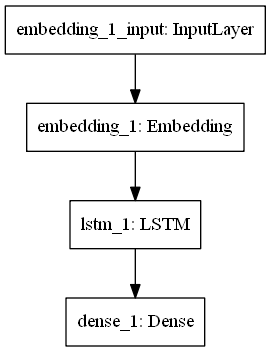

In [10]:
print(model.summary())
from keras.utils import plot_model
plot_model(model)

In [11]:
#   Compile
model.compile(loss='binary_crossentropy',  
            optimizer='adam',              
            metrics=['accuracy'])

In [14]:
%%time
#   Train - with early stopping ~3 min
BATCH_SIZE = 24 #based on prior work by instructor
EPOCHS = 5
#val_acc replaced with val_accuracy
cbk_early_stopping = EarlyStopping(monitor='val_accuracy', patience=2, mode='max')
model.fit(x_train, y_train, BATCH_SIZE, epochs=EPOCHS, 
            validation_data=(x_test, y_test), 
            callbacks=[cbk_early_stopping] )

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 41s 2ms/step - loss: 0.2414 - accuracy: 0.9046 - val_loss: 0.3970 - val_accuracy: 0.8436
Epoch 2/5
25000/25000 [==============================] - 41s 2ms/step - loss: 0.2176 - accuracy: 0.9150 - val_loss: 0.4093 - val_accuracy: 0.8402
Epoch 3/5
25000/25000 [==============================] - 41s 2ms/step - loss: 0.1940 - accuracy: 0.9235 - val_loss: 0.4406 - val_accuracy: 0.8364
Wall time: 2min 4s


In [13]:
score, acc = model.evaluate(x_test, y_test,
                            batch_size=BATCH_SIZE)
print('test score:', score, ' test accuracy:', acc)

25000/25000 [==============================] - 9s 363us/step
test score: 0.3952104781985283  test accuracy: 0.8324800133705139
